# Лабораторная работа №1 по курсу "Машинное обучение".
## Первый датасет
Студент группы М8О-307Б-17 Дергач Дмитрий Константинович

## Постановка задачи:
Необходимо сформировать два набора данных для приложений машинного обучения. Первый датасет должен представлять из себя табличный набор данных для задачи классификации. Второй датасет должен быть отличен от первого, и может представлять из себя набор изображений, корпус документов, другой табличный датасет или датасет из соревнования Kaggle, предназначенный для решения интересующей вас задачи машинного обучения. Необходимо провести анализ обоих
наборов данных, поставить решаемую вами задачу, определить признаки необходимые для решения задачи, в случае необходимости заняться генерацией новых признаков, устранением проблем в данных, визуализировать распределение и зависимость целевого признака от выбранных признаков. В отчете описать все проблемы, с которыми вы столкнулись и выбранные подходы к их решению.

## Первый датасет:
Первый датасет представляет собой статистику и проведенных и будующих (ячейки пустые, но они есть) Олимпийских игр. Хоть датасет не имеет множетсва зависимостей и большую пользу для анализа, однако в качетстве ознакомления его можно использовать. В данном датасете будет решаться проблема проишествий на Олимпийских играх, а именно какая их причина.

## Обращение к датасету

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
olympic = pd.read_csv('/Users/dmitry/MAI/3_year/AI/AI_Lab_1/Olympic_games/olympic_hosts.csv')
olympic.head(63)

,Type,GamesUrl,Disciplines,DisciplinesList,Country,Date,Athletes,Countries,Events,City,Year
0,summergames,https://www.olympic.org/athens-1896,10,"['Athletics', 'Cycling Road', 'Cycling Track',...",Greece,06 Apr - 15 Apr,241.0,14.0,43.0,Athens,1896
1,summergames,https://www.olympic.org/paris-1900,20,"['Archery', 'Athletics', 'Basque Pelota', 'Cri...",France,14 May - 28 Oct,997.0,24.0,95.0,Paris,1900
2,summergames,https://www.olympic.org/st-louis-1904,19,"['Archery', 'Athletics', 'Basketball', 'Boxing...",United States of America,01 Jul - 23 Nov,651.0,12.0,95.0,St Louis,1904
3,summergames,https://www.olympic.org/london-1908,25,"['Archery', 'Athletics', 'Boxing', 'Cycling Tr...",Great Britain,27 Apr - 31 Oct,2008.0,22.0,110.0,London,1908
4,summergames,https://www.olympic.org/stockholm-1912,18,"['Athletics', 'Cycling Road', 'Diving', 'Eques...",Sweden,05 May - 27 Jul,2407.0,28.0,102.0,Stockholm,1912
...,...,...,...,...,...,...,...,...,...,...,...
58,wintergames,https://www.olympic.org/beijing-2022,0,[],People's Republic of China,04 Feb - 20 Feb,NaN,NaN,NaN,Beijing,2022
59,youthgames,https://www.olympic.org/dakar-2022,0,[],Senegal,22 Oct - 09 Nov,NaN,NaN,NaN,Dakar,2022
60,summergames,https://www.olympic.org/paris-2024,0,[],France,26 Jul - 11 Aug,NaN,NaN,NaN,Paris,2024
61,wintergames,https://www.olympic.org/milano-cortina-2026,0,[],Italy,NaN,NaN,NaN,NaN,Milano Cortina,2026


## Удаление пустых полей
Так как в датасете присутствуют пустые поля, то мы их просто удалим и обновим наш датасет.

In [22]:
print(f'Total shape {olympic.shape}')
print(f'All columns: {", ".join(olympic.columns.values)}')

Total shape (63, 11)
All columns: Type, GamesUrl, Disciplines, DisciplinesList, Country, Date, Athletes, Countries, Events, City, Year


In [23]:
olympic = olympic.dropna()
print(f'Total shape {olympic.shape}')
print(f'All columns: {", ".join(olympic.columns.values)}')

Total shape (57, 11)
All columns: Type, GamesUrl, Disciplines, DisciplinesList, Country, Date, Athletes, Countries, Events, City, Year


## Предварительный анализ данных
Произведем статистический анализ данных, а именно: для каждого столбца опишем его свойства (если это возможно). Для будущего анализа нам пригодятся только численные значения, поэтому значения object мы просто игнорируем.

In [24]:
olympic.describe(include = "all")

,Type,GamesUrl,Disciplines,DisciplinesList,Country,Date,Athletes,Countries,Events,City,Year
count,57,57,57.000000,57,57,57,57.000000,57.000000,57.000000,57,57.000000
unique,3,57,NaN,36,27,55,NaN,NaN,NaN,47,NaN
top,summergames,https://www.olympic.org/sarajevo-1984,NaN,"['Alpine Skiing', 'Biathlon', 'Bobsleigh', 'Cr...",United States of America,04 Feb - 15 Feb,NaN,NaN,NaN,London,NaN
freq,28,1,NaN,7,8,2,NaN,NaN,NaN,3,NaN
mean,NaN,NaN,17.666667,NaN,NaN,NaN,3550.368421,82.701754,123.263158,NaN,1970.666667
std,NaN,NaN,11.369341,NaN,NaN,NaN,3238.871820,62.465981,89.457996,NaN,35.793721
min,NaN,NaN,0.000000,NaN,NaN,NaN,241.000000,12.000000,14.000000,NaN,1896.000000
25%,NaN,NaN,10.000000,NaN,NaN,NaN,1072.000000,35.000000,43.000000,NaN,1948.000000
50%,NaN,NaN,15.000000,NaN,NaN,NaN,2508.000000,69.000000,102.000000,NaN,1976.000000
75%,NaN,NaN,25.000000,NaN,NaN,NaN,5151.000000,93.000000,195.000000,NaN,2002.000000


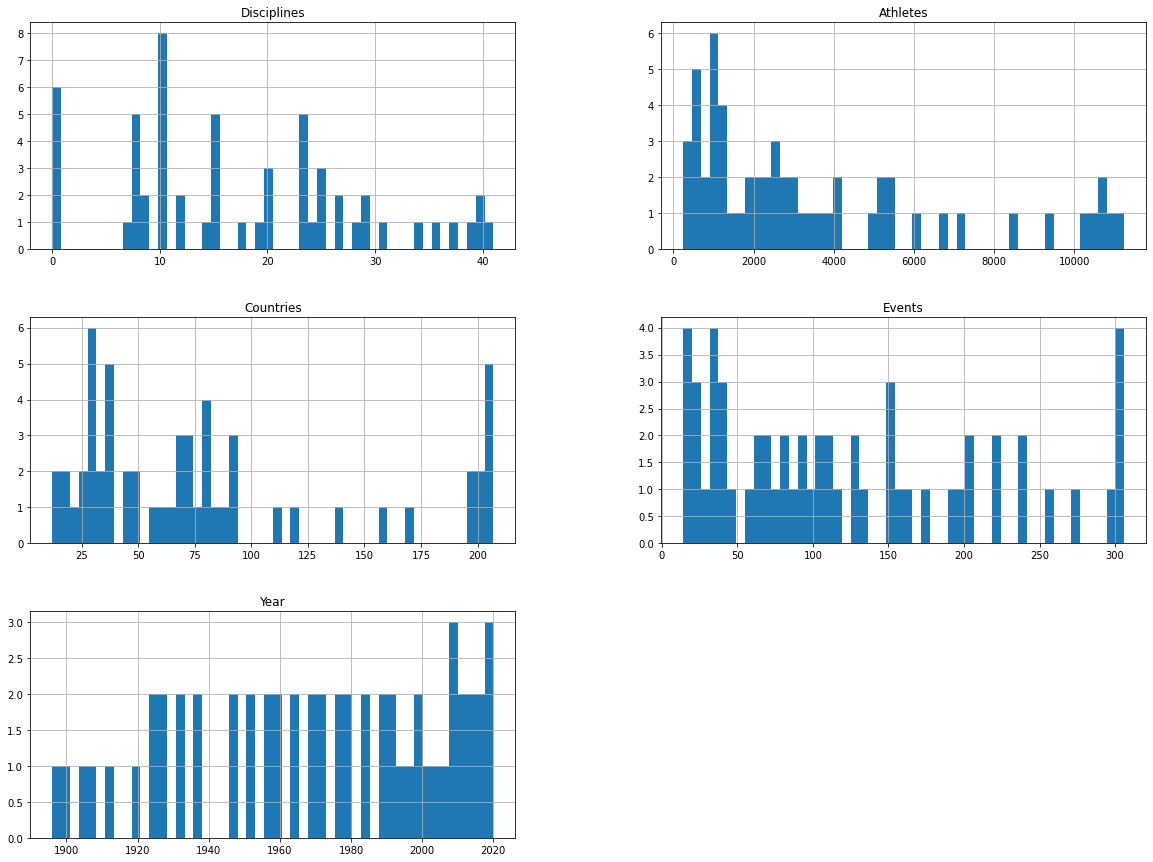

In [25]:
olympic.hist(bins = 50, figsize = (20, 15))
plt.savefig('./olympic_hist.png')
plt.show()

In [26]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 57
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             57 non-null     object 
 1   GamesUrl         57 non-null     object 
 2   Disciplines      57 non-null     int64  
 3   DisciplinesList  57 non-null     object 
 4   Country          57 non-null     object 
 5   Date             57 non-null     object 
 6   Athletes         57 non-null     float64
 7   Countries        57 non-null     float64
 8   Events           57 non-null     float64
 9   City             57 non-null     object 
 10  Year             57 non-null     int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 5.3+ KB


## Визуализация и анализ данных
Построим графики зависимостей основных численных значений: участники, дисциплины, страны,проишествия.

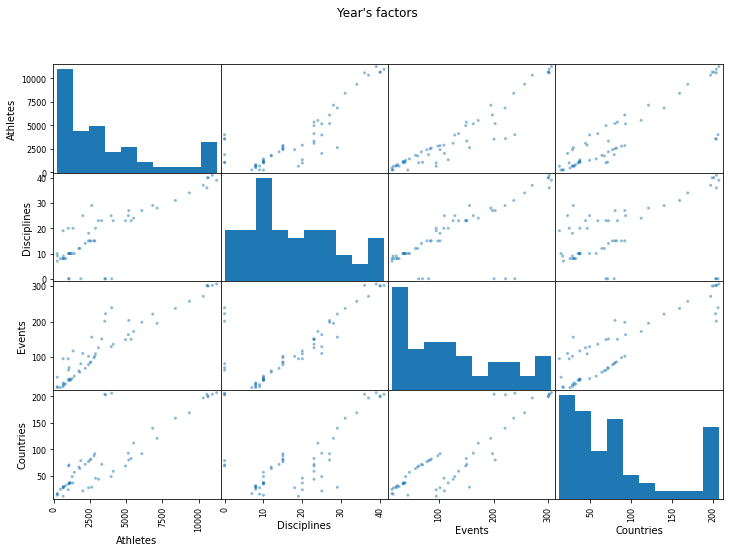

In [50]:
from pandas.plotting import scatter_matrix
attributes = ["Athletes", "Disciplines", "Events", "Countries"] 

scatter_matrix(olympic[attributes], figsize=(12, 8))
plt.suptitle("Year's factors")
plt.savefig('./Year factors.png')

## Корреляция признаков

In [48]:
corr_matrix = olympic.corr()
corr_matrix["Events"].sort_values(ascending=False)

Events         1.000000
Athletes       0.937922
Countries      0.884962
Disciplines    0.745816
Year           0.389473
Name: Events, dtype: float64

In [49]:
corr_matrix = olympic.corr()
corr_matrix["Athletes"].sort_values(ascending=False)

Athletes       1.000000
Events         0.937922
Countries      0.846559
Disciplines    0.833875
Year           0.422416
Name: Athletes, dtype: float64

In [44]:
corr_matrix = olympic.corr()
corr_matrix["Year"].sort_values(ascending=False)

Year           1.000000
Countries      0.690516
Athletes       0.422416
Events         0.389473
Disciplines   -0.006992
Name: Year, dtype: float64

Как видно, что на фактов проишествия основное значения имели факторы количество участников и стран, что впринципе совпадает с действительность. Также можно проследить эту зависимость и в графиках

## Вывод
Таким образом, был проанализирован первый датасет. Хоть в нем и не получилось составить сложный анализ, однако этого было достаточно, чтобы ознакомиться с анализом данных.